# Cargamos las librerías iniciales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

# Descripción de Columnas
Las columnas del dataset describen aspectos físicos del asteroide como también de su orbita con respecto a la Tierra. Todas las características de órbita son con respecto a la Tierra.

* Semi-Major Axis (a): Se refiere a la mitad del diametro más largo de la elipse
* Eccentricity (e): Se refiere a la cantidad en la que la orbita del asteroide se desvía de la forma de un círculo
* Inclination with respect to x-y ecliptic plane (deg): "Although all the planets and asteroids follow elliptical orbits around the Sun (obeying Kepler’s First Law), these orbits do not all lie in the same plane – they are usually tilted with respect to each other. As Earth-bound humans, we have adopted the plane in which the Earth moves around the Sun (the ecliptic) as our reference plane for the Solar System. With this convention, the Earth has an orbital inclination of zero degrees, and the orbital inclinations of other Solar System bodies are measured relative to this (for example, Mars has an orbital inclination of 1.85o, Mercury: 7.00o and Pluto: 17.15o)." Tomado de https://astronomy.swin.edu.au/cosmos/O/orbital+inclination. En nuestro caso sería una referencia relativa al asteroide.
* Longitude of the Ascending Node (om): "The point where the orbit passes through the reference plane in an “upward” direction is called the ascending node. Thus, the second orientation angle of the orbit is the angle between the ascending node and some reference direction in the reference plane, as seen from the Sun. In our solar system, the reference direction is usually taken to be the direction toward the vernal equinox. This angle is known as the longitude of the ascending node, Ω." Tomado de: https://www.sciencedirect.com/topics/physics-and-astronomy/longitude-of-the-ascending-node
* Argument of Perihelion (w): Es la distancia angular del ascending node hasta la el perhilion medido en el plano orbital.
* Periphelion Distance (q): Es la distancia de la orbita del asteroide en la cual se encuentra lo más cercano al sol.
* Aphelion Distance (ad): Es la distancia de la orbita del asteroide en la cual se encuentra lo más alejada del sol.
* Orbital Period in Years (per_y): Se refiere al tiempo en que se tarda el asteroide en completar su orbita alrededor de la Tierra en años.
* Data Arc-Span (data_arc): Sin descripción
* Orbit Condition Code (condition_code): Se refiere a un parámetro de incertidumbre sobre la órbita del asteroide
* Number of observation used (n_obs_used): Número de observaciones que se le hicieron al asteroide para establecer las demás características.
* Absolute Magnitude Parameter (H): Se refiere a la magnitud en la cual una estrella aparecería estar si se situara a 10 parsecs de un asteroide (1 parsec = 30 trillones de km aprox = 3 años luz)
* Near Earth Object (neo): Es un objeto celestial que pasa relativamente cerca a la órbita de la Tierra
* Physically Hazardous Asteroid (pha) VARIABLE OBJETIVO: Es un asteroide que hace trayectos cercanos a la órbita de la Tierra y tiene el tamaño suficiente como para poder causar daños severos en caso de impacto con nuestro planeta.
* Diameter of Asteroid in km (diameter): Diámetro del asteroide en kilómetros
* Object bi/tri axial ellipsoid dimensions km (extent): Sin descripción
* Geometric Albedo (albedo): "...the ratio of its total brightness at zero phase angle to that of an idealised fully reflecting, diffusively scattering (Lambertian) disk with the same cross-section." Tomado de https://space.fandom.com/wiki/Geometric_albedo
* Rotation Period in hours (rot_per): Tiempo en horas que le tarda al asteroide hacer una revolución en su propio eje.
* Standard Gravitational Parameter (GM): Producto de la masa y la constante gravitacional
* Color Index B-V magnitude difference (BV): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Color Index U-B magnitude difference (UB): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Color Index I-R magnitude difference (IR): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Spectral Taxonomic type SMASSII (spec_B): Una clasificación dada al color que emite el asteroide
* Spectral Taxonomic type Tholen (spec_T): Una clasificación dada al color que emite el asteroide
* Magnitude Slope Parameter (G): No hay descripción
* Earth Minimum Orbit Intersection Distance au (moid): "The minimum orbital intersection distance (MOID) is used as a measure to assess potential close approaches and collision risks between astronomical objects" Tomado de https://www.aanda.org/articles/aa/full_html/2020/01/aa36502-19/aa36502-19.html
* Asteroid Orbit Class (class): MBA se refiere a Main Belt Asteroid, son asteroides que se encuentran en el anillo de asteroides que se encuentra entre Marte y Júpiter. OMB se refiere a Outer Main Belt Asteroid, son asteroides que se encuentran en el anillo de asteroides que se encuentran hasta Neptuno. Existen varias diferentes clasificaciones.
* Mean motion deg/d (n): No hay descripción
* Orbital Period d (per): Días que se tarda el asteroide en completar su orbita alrededor de la Tierra
* Mean Anomaly deg (ma): "The mean anomaly is the angle between lines drawn from the Sun to the perihelion B and to a point (not shown) moving in the orbit at a uniform rate corresponding to the period of revolution of the planet." Tomado de https://www.britannica.com/science/anomaly-astronomy#ref105659

In [2]:
df = pd.read_csv('Asteroid_Updated.csv')
df.head()

c:\users\hansr\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [3]:
df.shape

(839714, 31)

In [4]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

Diameter debe ser una columna númerica por lo que haremos el cambio de data type correspondiente. No está incluído el error que salió previo a la elaboración final del notebook pero ocurrió un error al tratar de convertir la columna a números ya que era de texto y en algunos campos tenían espacios. Por lo mismo, previo a convertirla númerica le quité todos los espacios en blanco de las observaciones para que la función logrará hacer la transformación.

In [5]:
df['diameter'] = df['diameter'].str.strip()
df["diameter"] = pd.to_numeric(df["diameter"], downcast="float")

In [6]:
df.shape

(839714, 31)

In [7]:
df['pha'].value_counts()

N    821257
Y      2015
Name: pha, dtype: int64

# Explicación de distribución de variable objetivo PHA (Physically Hazardous Asteroid)
Para tener un poco de contexto, actualmente el número de asteroides, meteoritos y cometas que se consideran peligrosos para la humanidad son un número bastante bajo. Existen innumerables objetos del mismo tipo en nuestro sistema solar. Residuos de colisiones de planetas dentro de nuestro sistema solar, como también de objetos fuera de nuestra vecindad local. Teniendo esto en cuenta, la NASA ha declarado públicamente que el número de objetos que son peligrosos para la Tierra son pocos. El asteroide más notorio actualmente es Apophis, tiene una longitud/diametro de 340 metros y se había sugerido que iba a tener una trayectoria sumamente cercana a la Tierra en el año 2029. Tras varios análisis descartaron la posibilidad y calcularon que en el año 2068 tiene una probabilidad mínima de poder impactar con la Tierra. Con esto en mente, se puede justificar el bajo número de asteroides considerados como potencialmente peligrosos. El tamaño seguramente dicta lo suficiente para considerarse peligroso, pero se debe de tomar en cuenta características de su trayectoria ya que incluso asteroides de a penas cientos de metros son capaces de poder destruir ciudades enteras si se encuentran en la trayectoria justa. El tamaño necesario para erradicar la vida en la Tierra se ha estimado que tiene que ser de aproximadamente 96 km.

### Quitamos la columna pha puesto a que vamos a utilizar nuestra propia variable objetivo, ya que sería redundante tener dos columnas que describan algo similar

In [8]:
df.drop('pha', inplace=True, axis=1)

# Redifinir la variable objetivo
Si utilizamos a PHA como la variable objetivo, nuestro modelo seguramente va a hacer underperform drásticamente. Por lo mismo, vamos a cambiar nuestra clasificación a identificar todos los asteroides que tienen la capacidad de extinguir a la raza humana. El diametro necesario como para tener implicaciones globales es de 8km. No necesariamente destruiría físicamente toda la Tierra. Lo que ocurriría con este tipo de asteroide es que en el lugar de impacto obviamente dejaría todo devastado, pero por el impacto causaría cambios climáticos como también la difusión de gases tóxicos que se generaron por el impacto. Este tipo de químicos estando presentes en la atmósfera tienen la capacidad de extenderse a todo el mundo, y terminaría matando a todo ser vivo que estuviera en la superficie. Adicionalmente, también mataría la vida marina puesto a que al momento de llover, las nubes estarían desatando todos los químicos que se encontraran en el aire. Estaremos considerando todos los asteroides que superan los 8 km de diámetro como extinguidores, mientras que los que midan menos los consideraremos no catastróficos.

# Importancia de crear modelos
Los modelos de machine learning tienen que ser capaces de poder predecir qué asteroides son potencialmente peligrosos para la Tierra. Estos modelos van a tener que trabajar con este tipo de data, donde la variable objetivo no va a tener una distribución adecuada y probablemente encuentren más asteroides que no son una amenaza para nosotros. Actualmente no contamos con los sistemas necesarios para actuar y responder a estas amenazas. Sin embargo, la NASA ya está en proceso de crear un sistema de respuesta en el caso un asteroide tenga alta probabilidad de impacto con la Tierra. Su método de respuesta involucra envíar una cápsula espacial considerablemente grande, para impactar el asteroide y tratar de desviar su trayectoria. El asteroide más peligroso no es el que se detecta, son todos los que no se logran detectar y tienen alta probabilidad de impactarnos.

# Análisis de NA's
Podemos observar que existen varias columnas con NA's. No sería adecuado aplicar imputación ya que los NA's representan más del 50% de las observaciones. Si se aplicara imputación estaríamos cometiendo un error grave dado a que aunque utilizemos modelos de imputación, el algoritmo estaría prácticamente adivinando o teniendo predicciones poco precisas. La columna con mayor importancia es diámetro ya que es nuestra variable objetivo. No podemos tener NA's en la variable que estamos tratando de predecir. Vamos a poder usar solo el 3% total del dataset.

In [9]:
df.isnull().mean() * 100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
diameter          97.093772
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

Necesitamos ponerle énfasis a la variable objetivo, por lo cual hacemos un filtro para obtener todos los registros que no contengan NA's en esa columna.

In [10]:
df2 = df[df['diameter'].notna()]

Queremos eliminar las columnas que contengan más del 30% del total de datos de NA's

In [11]:
df3 = df2.loc[:, df2.isin([' ','NULL',0, np.nan]).mean() < .30]

In [12]:
df3.isnull().sum()

a              0
e              0
i              0
om             0
w              0
q              0
ad             0
per_y          0
data_arc       0
n_obs_used     0
H              0
neo            0
diameter       0
albedo        18
moid           0
class          0
n              0
per            0
ma             0
dtype: int64

In [13]:
df3.shape

(24404, 19)

# Categorizar los asteroides
Aplicamos primero un filtro para convertir en 1 a todos los asteroides que sean de 8km o más largos de diametro. Después simplemente ponemos que el resto de los datos se vuelvan 0's, identificandolos como no catastróficos.

In [14]:
df3.loc[df3['diameter'] >= 8, 'diameter'] = 1
df3.loc[df3['diameter'] != 1, 'diameter'] = 0

c:\users\hansr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\hansr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [15]:
df3['diameter'].value_counts()

0.0    15169
1.0     9235
Name: diameter, dtype: int64

Podemos ver que la variable objetivo ahora tiene una mejor distribución, a diferencia de la que estabamos utilizando originalmente de *pha*.

## Correlation Matrix
Podemos visualizar desde ahorita que no existe una correlación tan fuerte de los datos con respecto a la variable objetivo. Las variables que tienen más correlación serían **moid y H.**

<AxesSubplot:>

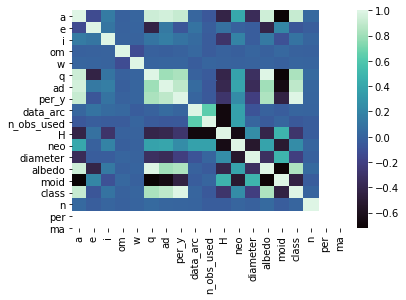

In [16]:
corr = df3.corr()
sns.heatmap(corr, xticklabels = df3.columns, yticklabels=df3.columns, cmap="mako")

# Distribución de los Datos

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'diameter'}>],
       [<AxesSubplot:title={'center':'albedo'}>,
        <AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'per'}>],
       [<AxesSubplot:title={'center':'ma'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

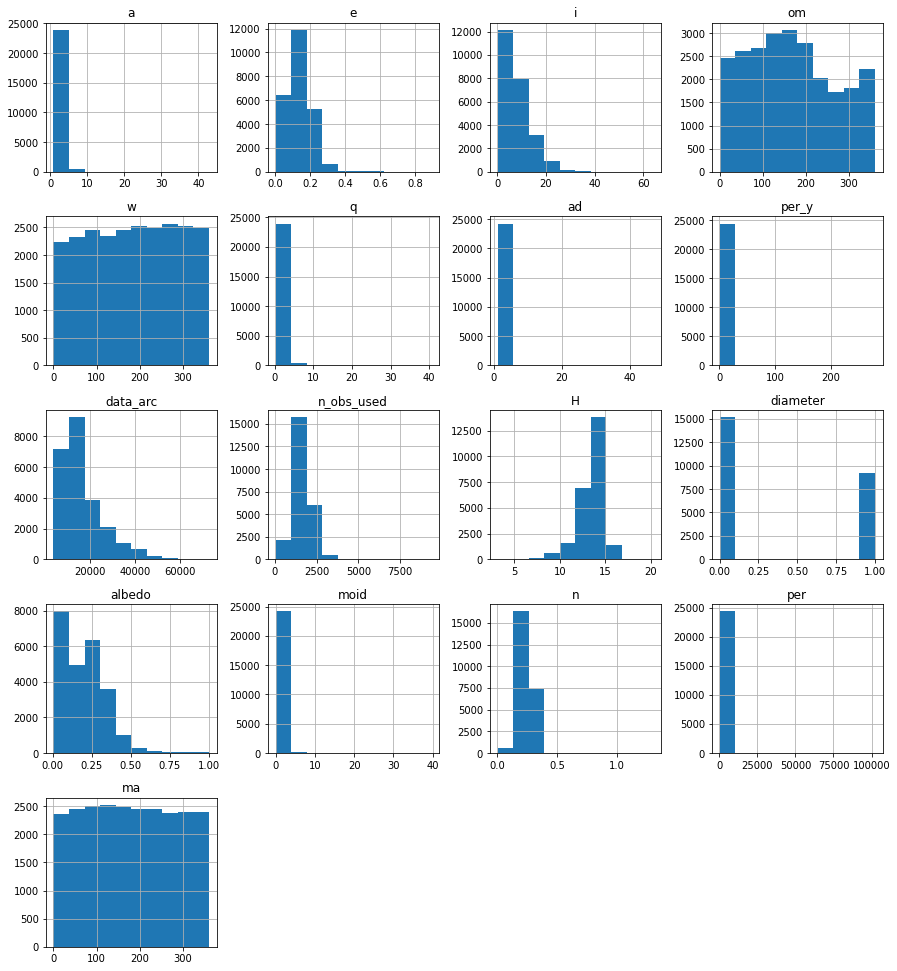

In [17]:
df3.hist(figsize=(15,17))

## Normalization Formula
La mayoría de columnas tienen una distribución no normal, por lo que nos indica que será más adecuado normalizarlos que utilizar un Standard Scaler. (El standard scaler funciona mejor con datos con distribuciones normales). Abajo podrán visualizar cómo funciona cada uno. Normalizer también se le conoce como un MinMaxScaler.
<div>
    <center><img src="Normalization-Formula.jpg" width="700"/></center>
</div>

## Standardization Formula
Este método hace un rescale a la data para que tenga una media de 0, y una desviación estándar de 1.
<div>
    <center><img src="stand.png" width="700"/></center>
</div>

# Imputation Method
Las imputaciones que haremos para los NA's que todavían están presentes serán hechas por la media, ya que si utilizamos el promedio estaríamos afectando los datos por los outliers que están presentes en la columna de albedo.
<div>
    <center><img src="imputation.png" width="700"/></center>
</div>

# Filtrado por Quantiles
Para poder asegurar lo más posible un buen set de datos, estaré filtrando por cuartiles la data. Quiero poder eliminar outliers sin tener que perjudicar la cantidad de datos que vamos a trabajar con.

In [18]:
cols = ['a', 'e', 'i', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'albedo', 'moid', 'n', 'per']
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df4 = df3[~((df3[cols] < (Q1 - 1.5 * IQR)) |(df3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df4.shape

(20868, 19)

In [19]:
df4['diameter'].value_counts()

0.0    14516
1.0     6352
Name: diameter, dtype: int64

El código de arriba elimina a todos los datos que se encuentren 1.5 veces afuera del intervalo intercuartil. Normalmente los cuartiles serían 25% y 75% pero lo más probable es que nos quedaríamos con un dataset sumamente pequeño. Necesitamos la mayor cantidad de datos posible para poder tener diversidad en las observaciones como también lo suficiente para que el modelo pueda aprender adecuadamente.

# Nueva distribución de datos

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'diameter'}>],
       [<AxesSubplot:title={'center':'albedo'}>,
        <AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'per'}>],
       [<AxesSubplot:title={'center':'ma'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

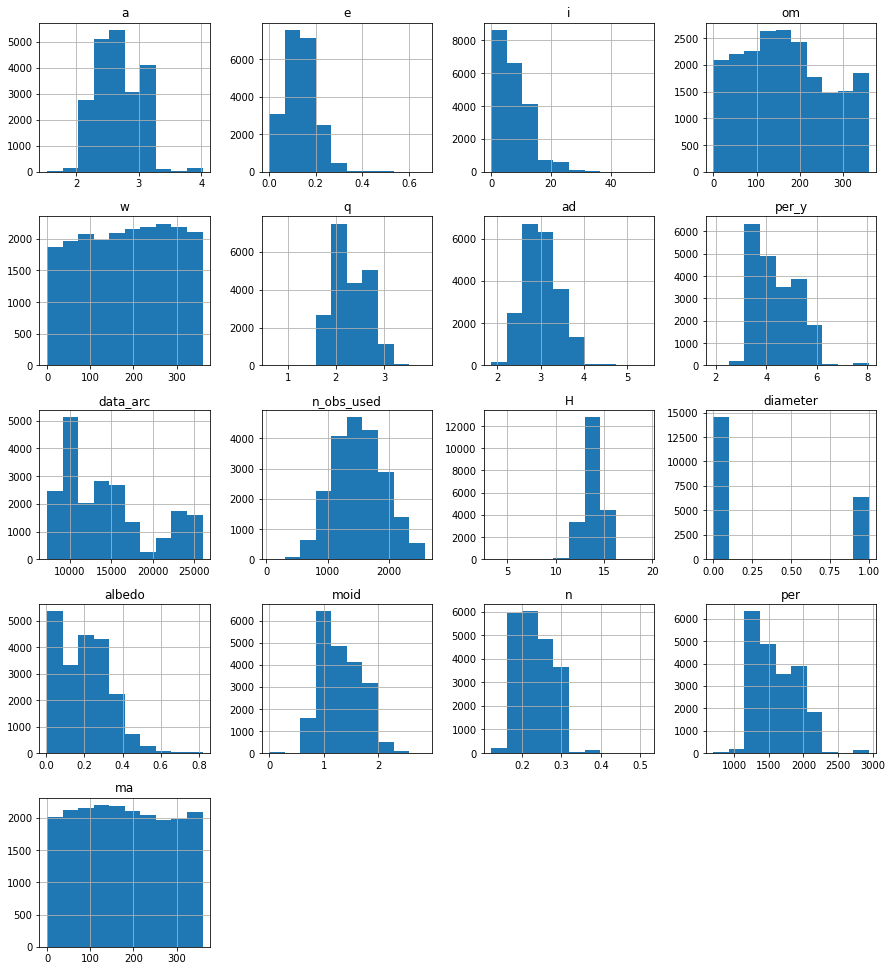

In [20]:
df4.hist(figsize=(15,17))

Logramos mejorar un poco la distribución y ahora se parecen más a una distribución normal. En vez de utilizar normalizer, vamos ahora a utilizar el Standard Scaler para transformar los datos.

In [21]:
df4.isnull().sum()

a              0
e              0
i              0
om             0
w              0
q              0
ad             0
per_y          0
data_arc       0
n_obs_used     0
H              0
neo            0
diameter       0
albedo        10
moid           0
class          0
n              0
per            0
ma             0
dtype: int64

# Exportar archivo para reproducibilidad
Exportamos el archivo reducido para poder utilizarse más adelante en los análisis posteriores. Este lo podrán encontrar adjunto con el entregable sin necesidad de correr los códigos anteriores.

In [22]:
df4.to_csv('asteroid_reduced.csv', index=False)
df5 = pd.read_csv('asteroid_reduced.csv')

# Separación variables X y Y

In [23]:
y = df5['diameter']
X = df5.drop('diameter', axis=1)

# Pre procesamiento columnas X's

# Pipelines para preprocessing
Necesitamos transformar la data para poder entregar al modelo un set de datos que pueda procesar. Utilizamos pipeline poder aplicar one hot encoding a las categóricas (hace dummify las variables para poder representarse en números y que el modelo de machine learning logre procesarlo), median imputer para la columna númerica que tiene NA's, y finalmente un Standard Scaler para rescale los valores

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


cat_pipeline = Pipeline([
        ('oh_enc', OneHotEncoder())
    ])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('normalize_data', StandardScaler())
    ])


In [25]:
num_col = X.select_dtypes(include='number').columns
cat_col = X.select_dtypes(exclude='number').columns

In [26]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_col),
        ("num", num_pipeline, num_col)
    ])

Se juntan los dos transformers para tener el full pipeline necesario para procesar el X_train y X_test

### Splitting Data
Separamos el dataset en 70% training y 30% testing, ponemos un random state para reproducibilidad y ponemos el parámetro shuffle como *True*  para que haga shuffle la data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=True)

In [28]:
X_train_processed = full_pipeline.fit_transform(X_train)
print(X_train_processed.shape)

(14607, 24)


In [29]:
X_test_processed = full_pipeline.fit_transform(X_test)
print(X_test_processed.shape)

(6261, 24)


# F1 Scoring
El F1 score es una combinación de las métricas de precision y recall. Nos da una accuracy del modelo.
* Precision: Son los positivos verdaderos divididos por la suma de todos los positivos verdaders y todos los negativos verdaderos
* Recall: Se refiere a la predicción correcta de los positivos, es la proporción entre los positivos verdaderos y todos los positivos.

Si queremos que el modelo tenga más precision, estamos diciendo que preferimos tener errores de un negativo falso. En nuestro caso, sería decir que preferimos cometer el error de clasificar a un asteroide como no peligroso cuando realmente lo es.
Si queremos que el modelo tenga más recall, estamos diciendo que preferimos tener errores de un falso positivo. En nuestro caso, sería decir que preferimos clasificar a un asteroide como potencialmente peligroso, cuando realmente no lo es.
Ambas métricas son importantes para nosotros, pues es sumamente peligroso no tener en cuenta que un asteroide es peligroso. Sin embargo, tampoco podemos gastar recursos y mandar una nave/cohete hacia un asteroide que no es peligroso ya que estaríamos gastando recursos, esfuerzos y dejándonos vulnerable al impacto de otro asteroide que probablemente sí llegue a la Tierra

In [30]:
from keras import backend as K
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision_2 = precision(y_true, y_pred)
    recall_2 = recall(y_true, y_pred)
    return 2*((precision_2*recall_2)/(precision_2+recall_2+K.epsilon()))

# Modelo Redes Neuronales
Nuestra red neuronal tiene 4 capas, de las cuales 3 son hidden layers que procesan y la última es el output layer. El primer layer es de 24 neuronas, ya que ese es la dimensión que contamos con nuestros datos X's. Después de manera consecutiva, se reduce el número de capas por la mitad hasta finalmente tener el output layer. Los hidden layers todos tienen activación relu que es lo estándar al usar redes. La parte más importante es la del output layer. Dependiendo del problema que estemos tratando de solucionar, se debe de escoger la función de activación apropiada para la output layer. En nuestro caso, como estamos prediciendo valores entre 0 y 1, utilizamos la función sigmoide. Abajo podrán ver que traté de utilizar un GridSearchCV para poder encontrar los parámetros óptimos del modelo. Sin embargo, estuve teniendo problemas con el procesamiento como también los resultados. Decidí mejor utilizar los modelos por separado.
<div>
    <center><img src="sigmoid.png" width="700"/></center>
</div>

In [31]:
'''
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(24, input_dim=24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=[f1_score])
    return model 

optimizer = ['SGD', 'adam']
batch_size = [10, 20, 40, 50]
epochs = [25, 50]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
model = KerasClassifier(build_fn=create_model, verbose=2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_processed, y_train)
'''

"\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndef create_model(optimizer='adam'):\n    model = Sequential()\n    model.add(Dense(24, input_dim=24, activation='relu'))\n    model.add(Dense(12, activation='relu'))\n    model.add(Dense(6, activation='relu'))\n    model.add(Dense(1, activation='sigmoid'))\n    model.compile(loss='binary_crossentropy', metrics=[f1_score])\n    return model \n\noptimizer = ['SGD', 'adam']\nbatch_size = [10, 20, 40, 50]\nepochs = [25, 50]\nparam_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)\nmodel = KerasClassifier(build_fn=create_model, verbose=2)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X_train_processed, y_train)\n"

# Parámetros
### Loss Function
Dado a que estamos trabajando simplemente con 1's y 0's, utilizamos la loss function de binary crossentropy. Este método compara cada una de las probabilidades predecidas a una clase (1 o 0). Dependiendo de la distancia que tiene con el score real, es como penaliza el modelo. 
<div>
    <center><img src="loss.png" width="700"/></center>
</div>

### Optimizador Adam
Actualiza los pesos de la redes neuronales iterativamente, y mantiene un promedio exponencial que decae de los gradientes anteriores. Este algoritmo se utiliza como un sustito al SGD.

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
model = Sequential()
model.add(Dense(24, input_dim=24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate=0.01)
model.compile(loss=['binary_crossentropy'], metrics=[f1_score], optimizer=opt)

In [33]:
model.fit(X_train_processed, y_train, epochs=50, batch_size=10, use_multiprocessing=True)

Epoch 1/50
1461/1461 [==============================] - 2s 759us/step - loss: 0.1624 - f1_score: 0.4388
Epoch 2/50
1461/1461 [==============================] - 1s 737us/step - loss: 0.1164 - f1_score: 0.4489
Epoch 3/50
1461/1461 [==============================] - 1s 745us/step - loss: 0.1040 - f1_score: 0.4493
Epoch 4/50
1461/1461 [==============================] - 1s 818us/step - loss: 0.1021 - f1_score: 0.4470
Epoch 5/50
1461/1461 [==============================] - 1s 769us/step - loss: 0.1025 - f1_score: 0.4491
Epoch 6/50
1461/1461 [==============================] - 1s 748us/step - loss: 0.1004 - f1_score: 0.4553
Epoch 7/50
1461/1461 [==============================] - 1s 706us/step - loss: 0.0993 - f1_score: 0.4507
Epoch 8/50
1461/1461 [==============================] - 1s 759us/step - loss: 0.0997 - f1_score: 0.4497
Epoch 9/50
1461/1461 [==============================] - 1s 765us/step - loss: 0.0979 - f1_score: 0.4479
Epoch 10/50
1461/1461 [==============================] - 1s 760u

In [34]:
results = model.evaluate(X_test_processed, y_test, batch_size=10, use_multiprocessing=True)
print("test loss, test acc:", results)

627/627 [==============================] - 0s 506us/step - loss: 0.0954 - f1_score: 0.4584
test loss, test acc: [0.09539930522441864, 0.4583682417869568]


Podemos ver que nuestro modelo se mantiene constante entre el training y el testing set con un F1 score de 45. Estaremos evaluando el modelo de SDG para ver si podemos mejorar la métrica.

### Stochastic Gradient Descent
Elabora una actualización de parámetros para cada observación del training set y su respectiva *y*. Siempre se inicializan con parámetros random the theta, y después el modelo va iterativamente trabajando en la pendiente de la función hasta que alcanza el punto más bajo posible. Tomado de: https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

In [35]:
model = Sequential()
model.add(Dense(24, input_dim=24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', metrics=[f1_score], optimizer=opt)

In [36]:
model.fit(X_train_processed, y_train, epochs=50, batch_size=10, use_multiprocessing=True)

Epoch 1/50
1461/1461 [==============================] - 1s 635us/step - loss: 0.2663 - f1_score: 0.4121
Epoch 2/50
1461/1461 [==============================] - 1s 689us/step - loss: 0.1268 - f1_score: 0.4429
Epoch 3/50
1461/1461 [==============================] - 1s 637us/step - loss: 0.1176 - f1_score: 0.4441
Epoch 4/50
1461/1461 [==============================] - 1s 634us/step - loss: 0.1110 - f1_score: 0.4433
Epoch 5/50
1461/1461 [==============================] - 1s 644us/step - loss: 0.1059 - f1_score: 0.4443
Epoch 6/50
1461/1461 [==============================] - 1s 649us/step - loss: 0.1023 - f1_score: 0.4443
Epoch 7/50
1461/1461 [==============================] - 1s 620us/step - loss: 0.0995 - f1_score: 0.4453
Epoch 8/50
1461/1461 [==============================] - 1s 650us/step - loss: 0.0977 - f1_score: 0.4457
Epoch 9/50
1461/1461 [==============================] - 1s 659us/step - loss: 0.0960 - f1_score: 0.4451
Epoch 10/50
1461/1461 [==============================] - 1s 619u

In [37]:
results = model.evaluate(X_test_processed, y_test, batch_size=10, use_multiprocessing=True)
print("test loss, test acc:", results)

627/627 [==============================] - 0s 525us/step - loss: 0.0928 - f1_score: 0.4600
test loss, test acc: [0.0928306058049202, 0.4600352942943573]


El modelo de SDG le ganó a Adam por a penas unos decimales.

# Conclusiones
## Calidad de Datos
Al inicio teníamos +800,000 registros de asteroides. El problema empezó cuando vimos que habían columnas con hasta 99% de data faltante, y estas se eliminaron ya que no nos iban a proveer mayor información o relevancia al predecir los resultados. Es posible que estas columnas ayuden a definir con más precisión las clases que estamos tratando de predecir. Otro problema relacionado con esto, era que nuestra variable objetivo también sufría de NA's y tuvimos que eliminar todos los registros para poder obtener solo las filas completas que eran a penas 24,000 del dataset total. 
## Poder computacional
Al tratar de elaborar el GridSearchCV, la computadora era capaz de procesar la información y carga. Sin embargo, se tardaba considerablemente y tenía problemas de sobre calentarse lo cual la ponía lenta ciertos momentos. Tampoco podía implementar todos los parámetros adicionales ya que esto agregaba complejidad como también carga de procesos a la computadora. En alguna futura oportunidad sería interesante tener un equipo de cómputo capaz de procesar este tipo de información de manera rápida.
## Tiempo
Relacionado con el punto anterior, estaba restringido al tiempo que le podía dedicar a cada modelo. Tenía que elaborar el reporte escrito dentro de este notebook, como también hacer la presentación que complementa el contenido de este notebook. Con el tiempo necesario, puede ser posible elaborar un modelo más robusto y dedicarle más tiempo al ajuste de parámetros.
## Calidad y Resultados del Modelo
Con el contexto de la data, considero que el modelo está decente para la calidad de datos que logramos imponerle. Utilizamos la métrica de F1 score ya que queremos tener la habilidad de poder clasificar bien los asteroides no peligrosos como también los peligrosos. **El F1 score más alto lo tuvo el modelo SDG con una puntuación de 46**. Podemos interpretar el resultado como el modelo desempeña de manera subóptima, ya que estaría mejor simplemente adivinar si el asteroide es peligroso o no. El modelo no puede clasificar bien si es peligroso o no es peligroso. Siempre es importante hacer todo el preprocesamiento necesario para poder reducir márgenes de error, aunque esto no asegure que el modelo vaya a ser óptimo. Otro factor que afecta el resultado son las variables categóricas ya que al aplicarles one hot encoding, puede ocasionar bastante ruido dentro de la data dependiendo de cuantas clases existen. (En nuestro caso era la columna de class) Más adelante se podría obtener nuevos datos de asteroides para tener una base de registros más grande y con la esperanza que el resto de columnas se encuentren con datos y no vacías.
## Futuro
Elaborando este proyecto tuve la esperanza de que alguien más pueda reproducir lo que se vió en este proyecto y poder aplicarlo ya en un ámbito profesional de astronomía. Seguramente tienen mejores conocimientos sobre qué datos son relevantes y los modelos a usar. No mucha gente está consciente de la amenaza que enfrentamos con objetos del espacio, y esto es dado a que las probabilidades que uno de ellos colisione con nosotros es casi nula. Pero en términos astronómicos, los porcentajes se interpretan de manera diferente. Cualquier presencia aunque sea mínima de riesgo llama la atención a cualquier entusiasta del espacio y profesionales a la vez. Adicionalmente, los sistemas de respuesta para este tipo de peligro toman tiempo en desarrollarse como también grandes cantidades de dinero. Es mejor estar preparados para cualquier circustancia que esperar al día que tengamos que elaborar un plan de contingencia improvisado. Espero que con este proyecto se haya resaltado la importancia de ponerle atención y consciencia a este tipo de amenazas, aunque no las enfrentemos todos los días. 
<div>
    <center><img src="asteroidpicture.jpg" width="700"/></center>
</div>

# Referencias
* Asteroid Belts. Asteroid Belts - an overview | ScienceDirect Topics. (n.d.). https://www.sciencedirect.com/topics/earth-and-planetary-sciences/asteroid-belts. 
* Basu, V. (2019, December 12). Open Asteroid Dataset. Kaggle. https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter. 
* Boslough, M., Nicoll, K., Holliday, V., &amp; Jull, A. J. T. (2021, February 24). Figure 3. The largest asteroid impact expected over a 20,000 year... ResearchGate. https://www.researchgate.net/figure/The-largest-asteroid-impact-expected-over-a-20-000-year-interval-is-250-m-Impact-by-an_fig3_259950697#:~:text=The%20mean%20recurrence%20interval%20for,the%20last%20100%20million%20years. 
* Brownlee, J. (2020, August 27). How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras. Machine Learning Mastery. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/. 
* Brownlee, J. (2021, January 21). How to Choose an Activation Function for Deep Learning. Machine Learning Mastery. https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/. 
* Childers, T. (2019, September 4). What's the Difference Between Asteroids, Comets and Meteors? LiveScience. https://www.livescience.com/difference-between-asteroids-comets-and-meteors.html. 
* Code Faster with Line-of-Code Completions, Cloudless Processing. Kite. (n.d.). https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-of-strings-to-floats-in-python#:~:text=Use%20pandas.,the%20column%20values%20to%20floats. 
* Dave Mosher, R. L. (2018, June 30). How large asteroids must be to destroy a city, state, country, or the planet. Business Insider. https://www.businessinsider.com/asteroid-sizes-that-can-damage-cities-states-planet-2018-6. 
* Encyclopædia Britannica, inc. (n.d.). Anomaly. Encyclopædia Britannica. https://www.britannica.com/science/anomaly-astronomy#ref105659. 
* Encyclopædia Britannica, inc. (n.d.). Encyclopædia Britannica. Encyclopædia Britannica Argument of the Perihelion. https://www.britannica.com/science/argument-of-the-perihelion. 
* Encyclopædia Britannica, inc. (n.d.). Encyclopædia Britannica. Encyclopædia Britannica Eccentricity Astronomy. https://www.britannica.com/science/eccentricity-astronomy. 
* Futurism. (2015, December 25). Armageddon: How Large Must an Asteroid be to Exterminate All Life on Earth? Futurism. https://futurism.com/19943. 
* Greicius, T. (2021, March 25). NASA Analysis: Earth Is Safe From Asteroid Apophis for 100-Plus Years. NASA. https://www.nasa.gov/feature/jpl/nasa-analysis-earth-is-safe-from-asteroid-apophis-for-100-plus-years. 
* How Big Does An Asteroid Have To Be To Destroy All Life? How Big Does An Asteroid Have To Be To Destroy All Life? | Inside Science. (n.d.). https://www.insidescience.org/video/how-big-does-asteroid-have-be-destroy-all-life. 
* https://www.aanda.org/articles/aa/full_html/2020/01/aa36502-19/aa36502-19.html
* Longitude of the Ascending Node. Longitude of the Ascending Node - an overview | ScienceDirect Topics. (n.d.). https://www.sciencedirect.com/topics/physics-and-astronomy/longitude-of-the-ascending-node. 
* Mi FunkMi Funk                    31511 gold badge33 silver badges88 bronze badges, RomainRomain                    13.1k55 gold badges4242 silver badges4949 bronze badges, E.ZolduoarratiE.Zolduoarrati                    62766 silver badges66 bronze badges, mgoldwassermgoldwasser                    11.3k1111 gold badges6363 silver badges9494 bronze badges, &amp; Rishabh SrivastavaRishabh Srivastava                    73744 silver badges1111 bronze badges. (1964, November 1). Remove Outliers in Pandas DataFrame using Percentiles. Stack Overflow. https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles. 
* NASA. (n.d.). Asteroid Watch. NASA. https://www.jpl.nasa.gov/asteroid-watch. 
* NASA. (n.d.). NEO Basics. NASA. https://cneos.jpl.nasa.gov/about/basics.html. 
* Old Farmer's Almanac. (n.d.). What Are Perihelion and Aphelion? Old Farmer's Almanac. https://www.almanac.com/content/what-aphelion-and-perihelion. 
* Orbital Inclination: COSMOS. Orbital Inclination | COSMOS. (n.d.). https://astronomy.swin.edu.au/cosmos/O/orbital+inclination. 
* Perlongo, K. (2021, April 23). Saving Earth from Asteroids. NASA. https://www.nasa.gov/feature/saving-earth-from-asteroids. 
* Ronaghan, S. (2019, August 1). Deep Learning: Which Loss and Activation Functions should I use? Medium. https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8. 
* Semi-major Axis: COSMOS. Semi-major Axis | COSMOS. (n.d.). https://astronomy.swin.edu.au/cosmos/s/Semi-major+Axis. 
* Serra, B. R., dice:, J. F., septiembre, R. dice:									11, dice:, R., dice:, G., junio, R. dice:									1, dice:, K. A. E. E. L. E. R. S. A. I. D. F. R. E. T. E. L. H. U. A. M. A. N., mayo, R. dice:									25, dice:, J. A., abril, R. dice:									21, dice:, J. L. M., noviembre, R. dice:									27, dice:, C. E. S. A. R., febrero, R. dice:									22, Dice:, L., enero, R. dice:									5, dice:, N. R., Dice:, J. O., Dice:, T., &amp; *, N. (2020, October 26). Rango intercuartílico. Universo Formulas. https://www.universoformulas.com/estadistica/descriptiva/rango-intercuartilico/. 
* Sharma, S. (2019, February 14). Activation Functions in Neural Networks. Medium. https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6. 
* What is a parsec? EarthSky. (n.d.). https://earthsky.org/space/what-is-a-parsec. 
* Wikimedia Foundation. (2021, April 12). Asteroid spectral types. Wikipedia. https://en.wikipedia.org/wiki/Asteroid_spectral_types. 
* Wikimedia Foundation. (2021, April 30). Uncertainty parameter. Wikipedia. https://en.wikipedia.org/wiki/Uncertainty_parameter. 
* Wikimedia Foundation. (2021, January 10). Color index. Wikipedia. https://en.wikipedia.org/wiki/Color_index. 
* ZelelBZelelB                    78711 gold badge66 silver badges1212 bronze badges, TasosTasos                    3, matzematze                    30111 silver badge33 bronze badges, Ashok Kumar JayaramanAshok Kumar Jayaraman                    15311 silver badge99 bronze badges, Justin LangeJustin Lange                    12133 bronze badges, &amp; Viacheslav KomisarenkoViacheslav Komisarenko                    35211 silver badge44 bronze badges. (1967, October 1). How to get accuracy, F1, precision and recall, for a keras model? Data Science Stack Exchange. https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model. 